In [1]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load arquivo wav
#stereo

x, sr = librosa.load('../IRMAS-Sample/Training/vio/001__[vio][nod][cou_fol]2194__1.wav', sr = None)

In [6]:
len(librosa.feature.zero_crossing_rate(x)[0])

259

In [5]:
librosa.feature.zero_crossing_rate(x)

array([[0.01416016, 0.02197266, 0.03173828, 0.03710938, 0.04541016,
        0.05224609, 0.05761719, 0.06396484, 0.06884766, 0.07470703,
        0.07714844, 0.08349609, 0.07958984, 0.07470703, 0.06689453,
        0.05371094, 0.04541016, 0.0390625 , 0.04052734, 0.04199219,
        0.04394531, 0.04589844, 0.04394531, 0.04150391, 0.04003906,
        0.03662109, 0.03173828, 0.02294922, 0.01513672, 0.00830078,
        0.00537109, 0.00585938, 0.00537109, 0.00585938, 0.00537109,
        0.0078125 , 0.00976562, 0.01074219, 0.01464844, 0.01220703,
        0.01513672, 0.01660156, 0.01708984, 0.01708984, 0.01416016,
        0.01464844, 0.01171875, 0.01757812, 0.02050781, 0.01806641,
        0.02539062, 0.02539062, 0.02636719, 0.03173828, 0.03076172,
        0.02832031, 0.02685547, 0.02734375, 0.02734375, 0.02880859,
        0.03027344, 0.02880859, 0.02392578, 0.02294922, 0.02294922,
        0.01904297, 0.02197266, 0.02539062, 0.03027344, 0.03466797,
        0.03515625, 0.03857422, 0.03271484, 0.03

<AxesSubplot:>

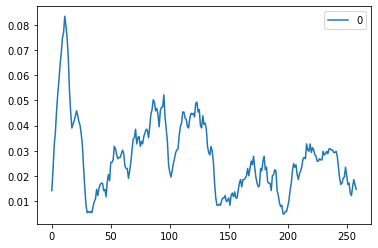

In [10]:
pd.DataFrame(librosa.feature.zero_crossing_rate(x)[0]).plot()

<AxesSubplot:>

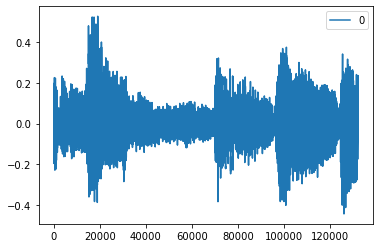

In [9]:
pd.DataFrame(x).plot()

In [3]:
# ja ta vindo em mono - default do load
x.shape

(132299,)

In [4]:
x_st, sr_st = librosa.load('../IRMAS-Sample/Training/vio/001__[vio][nod][cou_fol]2194__1.wav', sr = None, mono=False)

In [2]:
from playsound import playsound

playsound('../IRMAS-Sample/Training/vio/001__[vio][nod][cou_fol]2194__1.wav')

In [6]:
x_st.shape

(2, 132299)

In [7]:
x_st

array([[0.00082397, 0.00430298, 0.00125122, ..., 0.14910889, 0.14367676,
        0.13879395],
       [0.11019897, 0.11117554, 0.10437012, ..., 0.18719482, 0.16836548,
        0.15127563]], dtype=float32)

In [8]:
sr #44100 é o padrao, mas pode mudar

44100

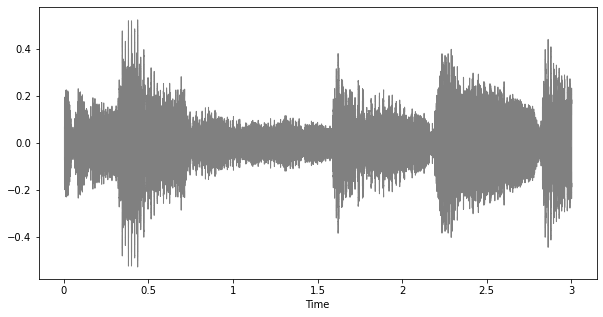

In [10]:
# formato de onda no dominio do tempo
plt.figure(figsize=(10,5))
librosa.display.waveshow(x, sr =sr, color='grey')
# plt.title('MONO')
plt.savefig('wave_big.png', bbox_inches='tight')

In [10]:
x[:40000]

array([0.05551147, 0.05773926, 0.05281067, ..., 0.10664368, 0.10188293,
       0.09480286], dtype=float32)

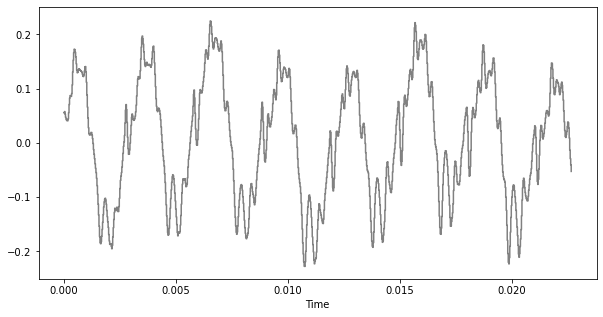

In [9]:
# formato de onda no dominio do tempo
plt.figure(figsize=(10,5))
librosa.display.waveshow(x[:1000], sr =sr, color='grey')
# plt.title('MONO')
plt.savefig('wave_small.png', bbox_inches='tight')

In [10]:
tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [11]:
beat_times

array([1.60217687, 2.21750567])

In [4]:
S = np.abs(librosa.stft(x))

In [45]:
44100/3

14700.0

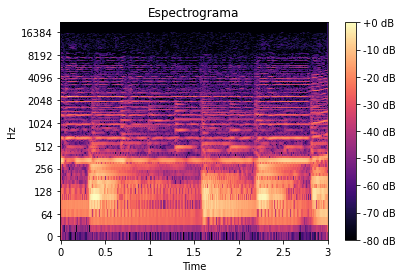

In [11]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax, hop_length=512, sr=sr)
ax.set_title('Espectrograma')
# plt.figure(figsize=(10,5))
# plt.yticks([0,  512, 1024, 2048, 4096, 8192, 16384])
fig.colorbar(img, ax=ax, format="%+2.0f dB")
# plt.ylim([0, 16384])
fig.savefig('espectrogram.png', bbox_inches='tight')
plt.show()

In [23]:
len(S)

1025

In [53]:
len(x)

132299

In [8]:
len(M)

128

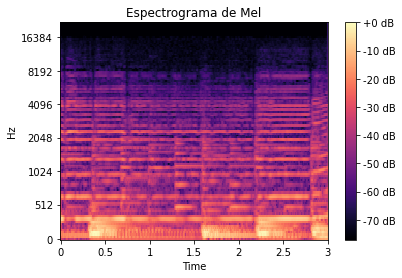

In [13]:
fig, ax = plt.subplots()
# fig.figsize(figsize=(20,5))
M = librosa.feature.melspectrogram(y=x, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max, amin=1e-05)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax, hop_length=512, sr=sr)
ax.set(title='Espectrograma de Mel')
# plt.xticks([-10, 100])
# print(plt.xticks())
fig.colorbar(img, ax=ax, format="%+2.f dB")
fig.savefig('mel_espectogram.png', bbox_inches='tight')

In [59]:
M_db.min()

-77.10517

In [54]:
plt.xticks

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

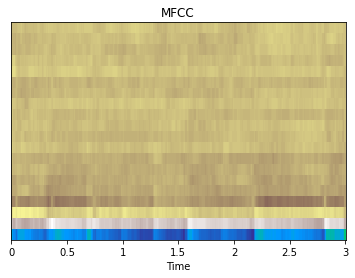

In [32]:
mfcc = librosa.feature.mfcc(y=x, sr=sr)
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap = 'terrain')
plt.title('MFCC')
plt.show()

In [14]:
mfcc.shape

(20, 259)

In [15]:
S_left = librosa.stft(x, center=False)

In [16]:
D_short = librosa.stft(x, hop_length=64)

In [17]:
x_st, sr_st

(array([[0.00082397, 0.00430298, 0.00125122, ..., 0.14910889, 0.14367676,
         0.13879395],
        [0.11019897, 0.11117554, 0.10437012, ..., 0.18719482, 0.16836548,
         0.15127563]], dtype=float32),
 44100)

In [18]:
x_st.shape[0]

2

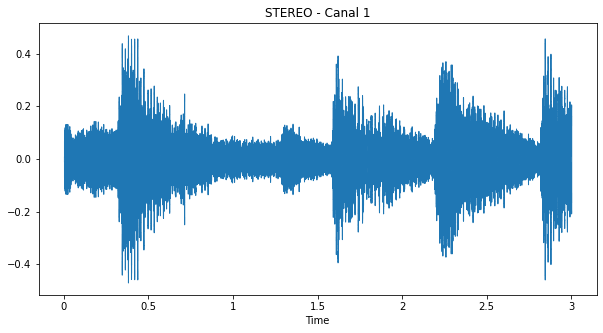

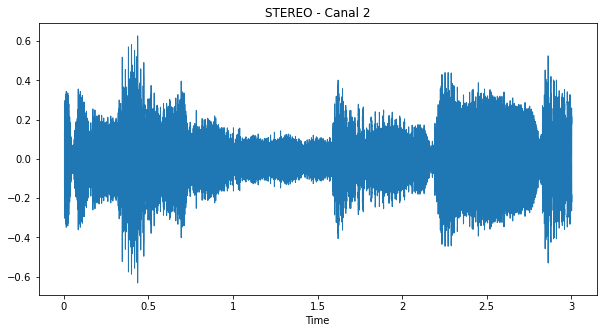

In [19]:
# formato de onda no dominio do tempo

for i in range(0, x_st.shape[0]):
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(x_st[i], sr =sr_st)
    plt.title('STEREO - Canal ' + str(i+1))

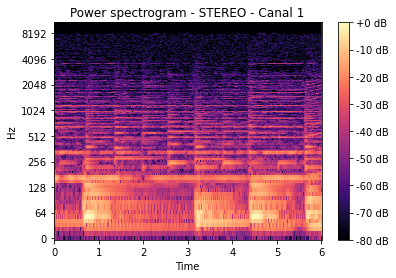

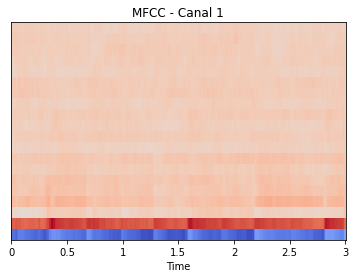

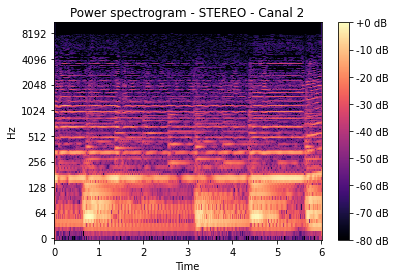

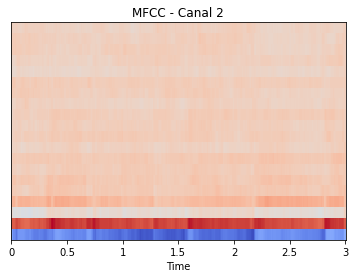

In [20]:
for i in range(0, x_st.shape[0]):
    S = np.abs(librosa.stft(x_st[i]))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                        ref=np.max),
                                y_axis='log', x_axis='time', ax=ax)
    ax.set_title('Power spectrogram - STEREO - Canal ' + str(i+1))
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()

    mfcc = librosa.feature.mfcc(y=x_st[i], sr=sr_st)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.title('MFCC - Canal ' + str(i+1))
    plt.show()

In [21]:
x_2, fs_2 = librosa.load('../IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav', sr = None)

In [22]:
x_st_2, sr_st_2 = librosa.load('../IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav', sr = None, mono=False)

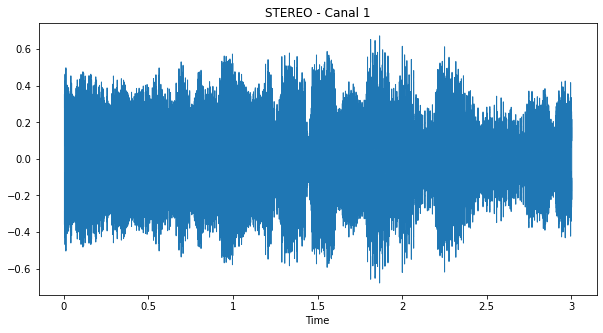

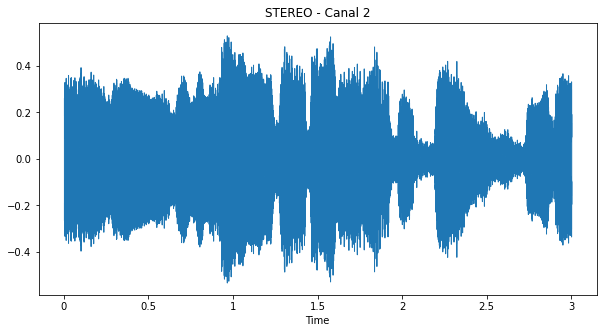

In [23]:
# formato de onda no dominio do tempo

for i in range(0, x_st_2.shape[0]):
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(x_st_2[i], sr =sr_st_2)
    plt.title('STEREO - Canal ' + str(i+1))

In [ ]:
# formato de onda no dominio do tempo

for i in range(0, x_st_2.shape[0]):
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(x_st_2[i], sr =sr_st_2)
    plt.title('STEREO - Canal ' + str(i+1))

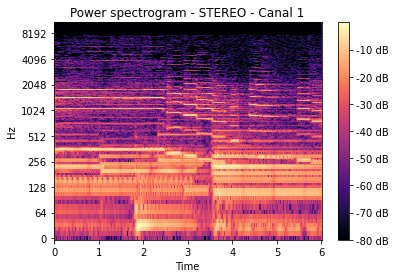

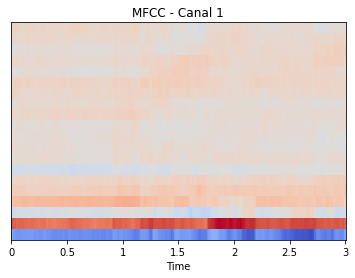

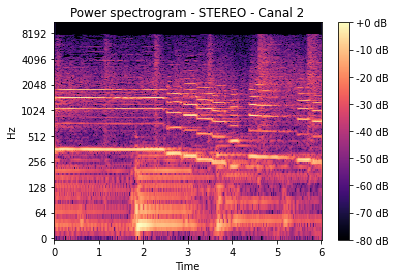

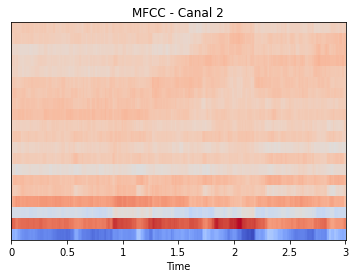

In [25]:
for i in range(0, x_st_2.shape[0]):
    S = np.abs(librosa.stft(x_st_2[i]))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                        ref=np.max),
                                y_axis='log', x_axis='time', ax=ax)
    ax.set_title('Power spectrogram - STEREO - Canal ' + str(i+1))
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()

    mfcc = librosa.feature.mfcc(y=x_st_2[i], sr=sr_st_2)
    librosa.display.specshow(mfcc, sr=sr_st_2, x_axis='time')
    plt.title('MFCC - Canal ' + str(i+1))
    plt.show()

In [26]:
from playsound import playsound

playsound('../IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav')

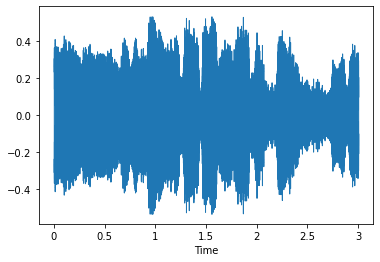

In [27]:
# formato de onda no dominio do tempo
librosa.display.waveshow(x_2, sr =fs_2)

In [28]:
S_2 = np.abs(librosa.stft(x_2))

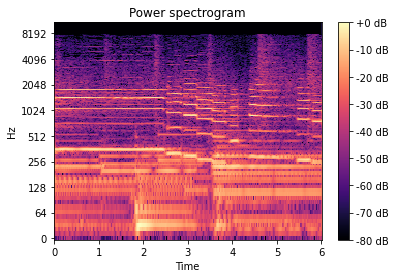

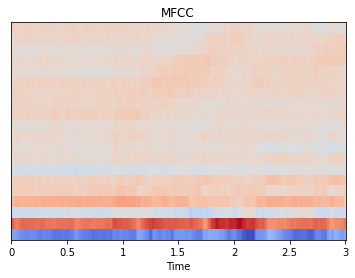

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_2,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

mfcc = librosa.feature.mfcc(y=x_2, sr=fs_2)
librosa.display.specshow(mfcc, sr=fs_2, x_axis='time')
plt.title('MFCC')
plt.show()